[Matplotlib](https://matplotlib.org/index.html) - is a Python plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Plotting requires action on a range of levels, from the most general (e.g., 'contour this 2-D array') to the most specific (e.g., 'color this screen pixel red'). The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

![alt-текст](images/matplotlib_anatomy.png)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

The easiest way to create a new figure is with pyplot:

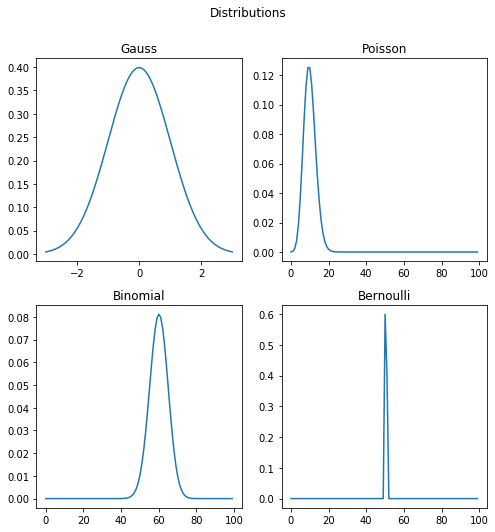

In [80]:
fig = plt.figure(figsize=(7,7))  # an empty figure with no axes
ax_lst = fig.subplots(2, 2)  # add Axes on the figure

x = np.arange(-3, 3, 0.01)
y = stats.norm.pdf(x)
ax_lst[0, 0].plot(x, y)
ax_lst[0, 0].set_title('Gauss')

x = np.arange(0, 100, 1)
y = stats.poisson.pmf(x, 10)
ax_lst[0, 1].plot(x, y)
ax_lst[0, 1].set_title('Poisson')

x = np.arange(0, 100, 1)
y = stats.binom.pmf(x, 100, 0.6)
ax_lst[1, 0].plot(x, y)
ax_lst[1, 0].set_title('Binomial')

x = np.arange(0, 100, 1)
y = stats.bernoulli.pmf(x, 0.4, 50)
ax_lst[1, 1].plot(x, y)
ax_lst[1, 1].set_title('Bernoulli')

fig.suptitle('Distributions', y=1.05)  # Add a title for the whole figure
fig.tight_layout() # Add padding where it should be
plt.show()

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with matplotlib.

### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist
Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### Types of inputs to plotting functions
All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

### Matplotlib, pyplot and pylab: how are they related?
Matplotlib is the whole package and matplotlib.pyplot is a module in Matplotlib.

For functions in the pyplot module, there is always a "current" figure and axes (which is created automatically on request). For example, in the following example, the first call to plt.plot creates the axes, then subsequent calls to plt.plot add additional lines on the same axes, and plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and add a legend.

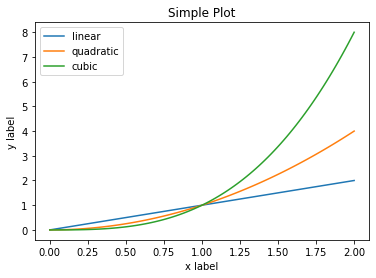

In [82]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend(loc='best')

plt.show()

pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and numpy (for mathematics and working with arrays) in a single namespace. pylab is deprecated and its use is strongly discouraged because of namespace pollution. Use pyplot instead.

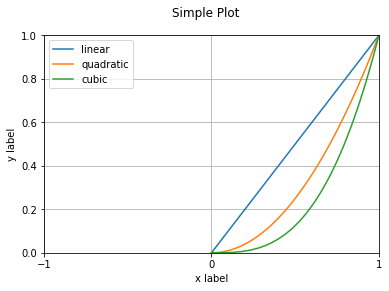

In [88]:
# Можно сделать тоже самое, только через более гибкий интерфейс
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Конструктор фигуры и одного объекта Axes

ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')

# Можно работать с осями более детально
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 1.0])
ax.set_xticks([-1, -0, 1])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.grid()

fig.suptitle('Simple Plot')

ax.legend(loc='best')

plt.show()

### Теперь давайте просто потренируемся:

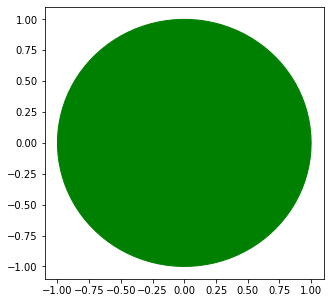

In [109]:
# Нарисуем зеленый круг

fig = plt.figure(figsize=(5,5))
# figsize - Figure dimension (width, height) in inches.
ax = fig.subplots()

t = np.linspace(0, 2 * np.pi, 100)

ax.fill(np.cos(t), np.sin(t), color='g')
plt.show()

fig.savefig('images/circle.png')  # Так можно сохранить фигуру

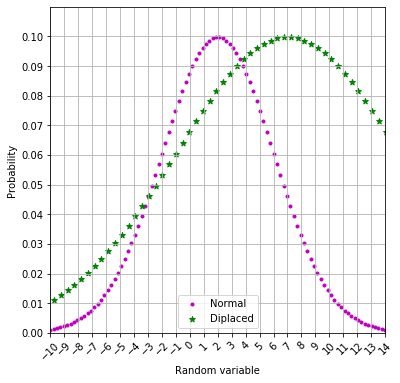

In [156]:
# Нарисуем нормальное распределение со средним = 2 и стандартным отклонением = 4
# Применить смещение 2x + 3
x = np.linspace(-10, 14, 100)
y = stats.norm.pdf(x, 2, 4)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

ax.set_xlabel('Random variable')
ax.set_ylabel('Probability')
ax.set_xlim([-10, 14])
ax.set_ylim([0, 0.11])
ax.set_xticks(np.arange(-10, 15, 1))
ax.set_yticks(np.arange(0, 0.11, 0.01))
ax.tick_params(axis='x', rotation=45)
ax.grid()

ax.scatter(x, y, color='m', marker='.')
ax.scatter(x * 2 + 3, y, color='g', marker='*')
ax.legend(['Normal', 'Diplaced'], loc='lower center')
plt.show()

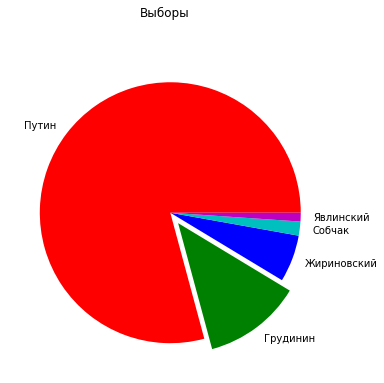

In [4]:
# Нарисуем круговую диаграмму выборов

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

candidates = ['Путин', 'Грудинин', 'Жириновский', 'Собчак', 'Явлинский']
votes = [56_430_712, 8_659_206, 4_154_985, 1_238_031, 769_644]

colors = ['r', 'g', 'b', 'c', 'm']
explode = [0, 0.1, 0, 0, 0]

ax.pie(votes, colors=colors, labels=candidates, explode=explode)
fig.suptitle('Выборы')
plt.show()

[0, 1, 2, 3]


Text(0.5, 1.0, 'Топ фильмов')

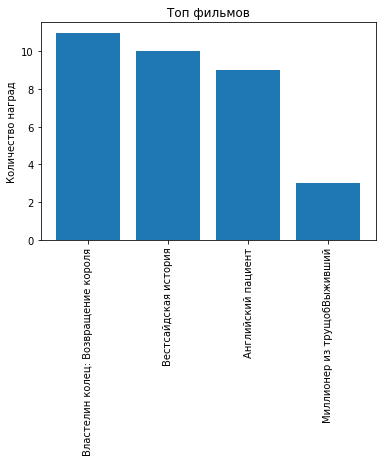

In [3]:
# Построить столбчатую диаграмму фильмов-премий оскар

# NOTE: Столбчатые диаграммы хорошо подходят для тех случаев, когда требуется показать варьируемость
# некоторой величины на некотором дискретном множестве элементов

movies = [
    'Властелин колец: Возвращение короля', 'Вестсайдская история', 
    'Английский пациент', 'Миллионер из трущоб'
    'Выживший'
]
num_oscars = [11, 10, 9, 3]

xs = [i for i, _ in enumerate(movies)]
print(xs)

plt.bar(xs, num_oscars)
plt.ylabel('Количество наград')
plt.xticks([i for i, _ in enumerate(movies)], movies, rotation=90)
plt.title('Топ фильмов')

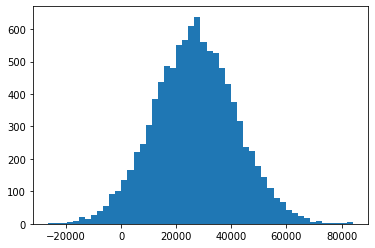

In [20]:
# Построим гистрограмму доходов

incomes = np.random.normal(27000, 15000, 10000)
plt.hist(incomes, bins=50)
plt.show()

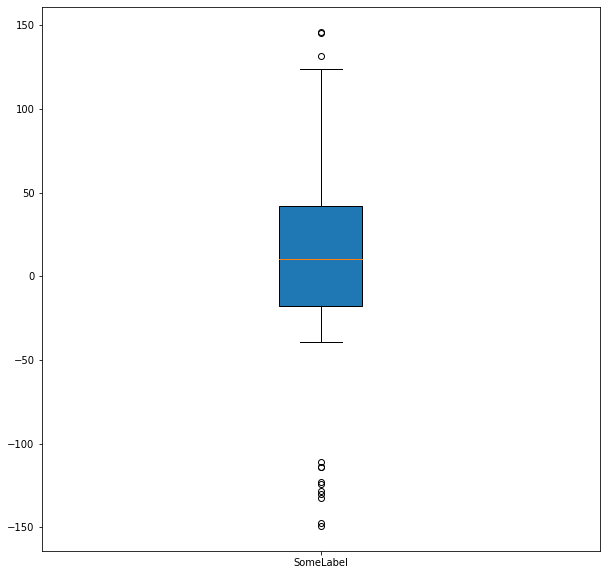

In [27]:
# Box-and-whisker plot

plt.figure(figsize=(10, 10))
uniformSkewed = np.random.rand(100) * 100 - 40
high_outliers = np.random.rand(10) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100
data = np.concatenate((uniformSkewed, high_outliers, low_outliers))
plt.boxplot(data, patch_artist=True, labels=['SomeLabel'])
plt.show()

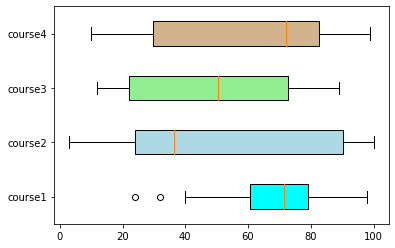

In [31]:
# A little bit more complicated Box-and-whisker plot

value1 = [82,76,24,40,67,62,75,78,71,32,98,89,78,67,72,82,87,66,56,52]
value2 = [62,5,91,25,36,32,96,95,3,90,95,32,27,55,100,15,71,11,37,21]
value3 = [23,89,12,78,72,89,25,69,68,86,19,49,15,16,16,75,65,31,25,52]
value4 = [59,73,70,16,81,61,88,98,10,87,29,72,16,23,72,88,78,99,75,30]
 
box_plot_data = [value1,value2,value3,value4]
box = plt.boxplot(
    box_plot_data, 
    vert=0,
    patch_artist=True,
    labels=['course1','course2','course3','course4']
)
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

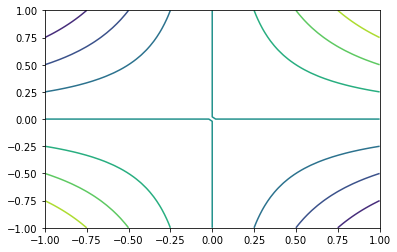

In [32]:
# Разберемся с линиями уровня

x = np.linspace(-1, 1, 50)
y = x
# внешнее произведение
# т.е, если размер x и y = 50, то размер z = (50, 50)
# где z[i][j] = x[i]*y[j]
z = x.reshape(-1, 1) * y

plt.contour(x, y, z)
plt.show()

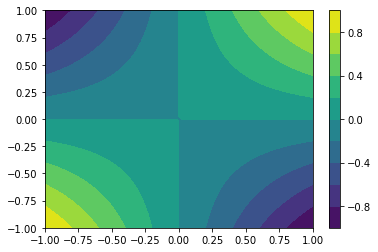

In [33]:
# Линия уровня с закрашиванием
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
# colorbar показывает соответствие цвета и значения z
plt.colorbar()
plt.show()

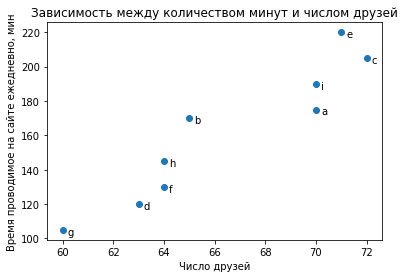

In [42]:
# Точечные диаграммы с аннотациями

friends = [70, 65, 72, 63, 71, 64, 60, 64, 70]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(
        label, 
        xy=(friend_count, minute_count),
        xytext=(5, -5),
        textcoords='offset points'
    )
    
plt.title('Зависимость между количеством минут и числом друзей')
plt.xlabel('Число друзей')
plt.ylabel('Время проводимое на сайте ежедневно, мин')
plt.show()

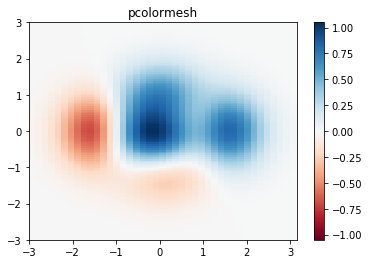

In [8]:
# Сетки c ячейками (примерно тоже, что и линии контуров)

# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[-3:3+dy:dy, -3:3+dx:dx]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)

plt.show()

### Рекомендую также посмотреть:
* Seaborn
* Cufflinks in Plotly

### Activity
Try creating a scatter plot representing random data on age vs. time spent watching TV. Label the axes.

In [43]:
age = np.random.poisson(30, 1000)
tv_time = np.random.exponential(6, 1000)